<a href="https://colab.research.google.com/github/NishatVasker/Mango-leaf/blob/main/MangoLeafTRAINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gdown

!gdown https://drive.google.com/uc?id=194bjp-C_4ShNR7vSoB90aN-Pt0Z8USeD


Downloading...
From: https://drive.google.com/uc?id=194bjp-C_4ShNR7vSoB90aN-Pt0Z8USeD
To: /content/MangoLeafBDDataset.zip
100% 108M/108M [00:05<00:00, 18.5MB/s]


In [3]:
!unzip /content/MangoLeafBDDataset.zip

Archive:  /content/MangoLeafBDDataset.zip
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124249 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124306 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124253 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124252 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124250 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124302 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124301 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124256 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124310 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124312 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124305 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124334 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/2

In [4]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import keras
from keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, Reshape, LSTM
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.applications import MobileNetV2

In [5]:
dir = '/content/MangoLeafBD Dataset'
labels = os.listdir(dir)
labels

['Bacterial Canker',
 'Die Back',
 'Cutting Weevil',
 'Healthy',
 'Sooty Mould',
 'Powdery Mildew',
 'Gall Midge',
 'Anthracnose']

In [6]:
for label in labels:
    print(label, len(os.listdir(dir+'/'+label)))

Bacterial Canker 500
Die Back 500
Cutting Weevil 500
Healthy 500
Sooty Mould 500
Powdery Mildew 500
Gall Midge 500
Anthracnose 500


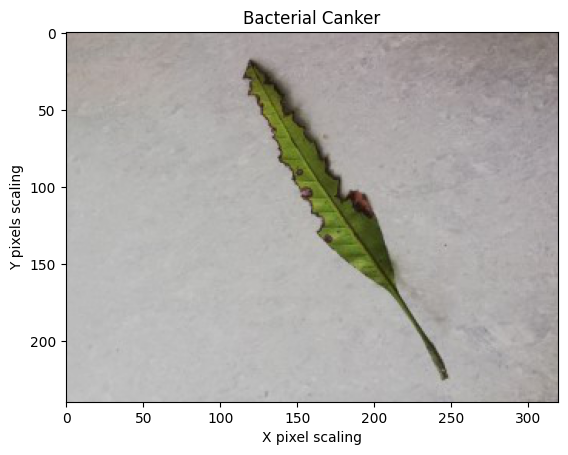

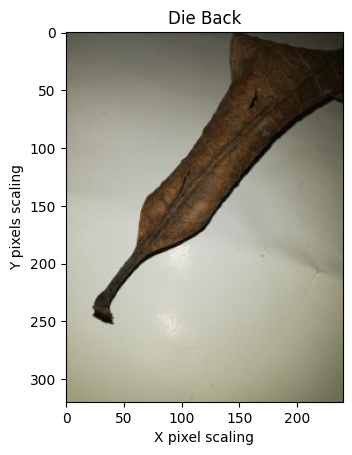

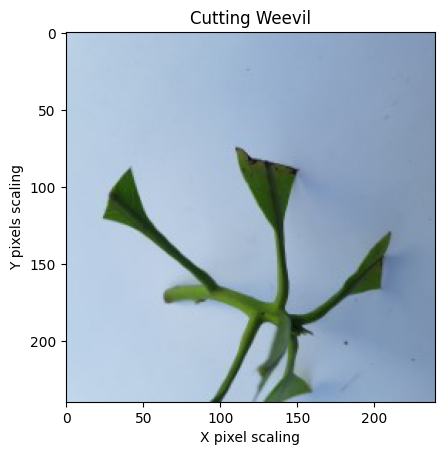

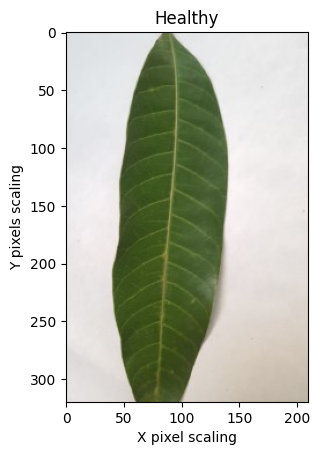

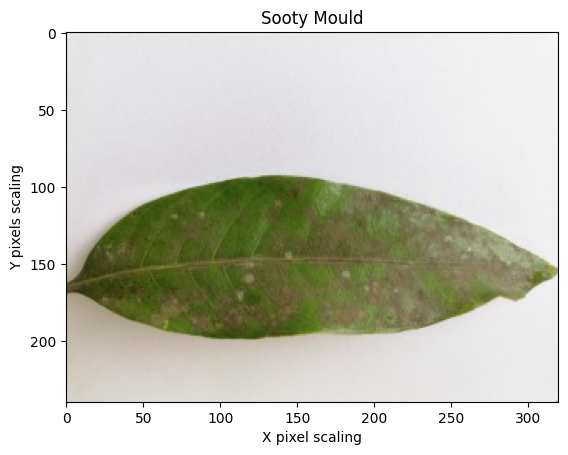

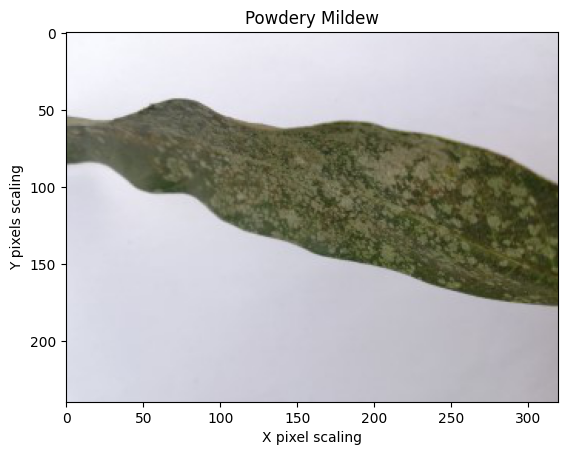

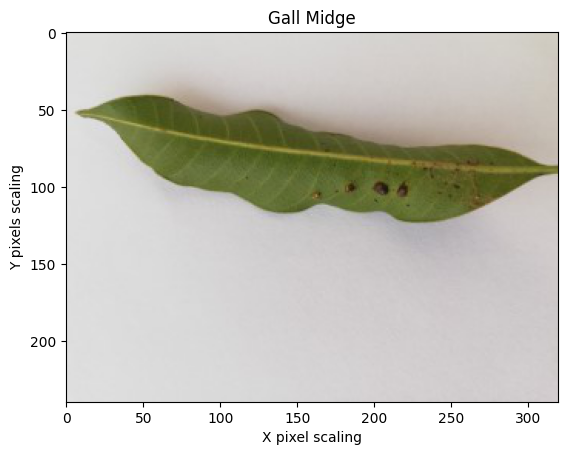

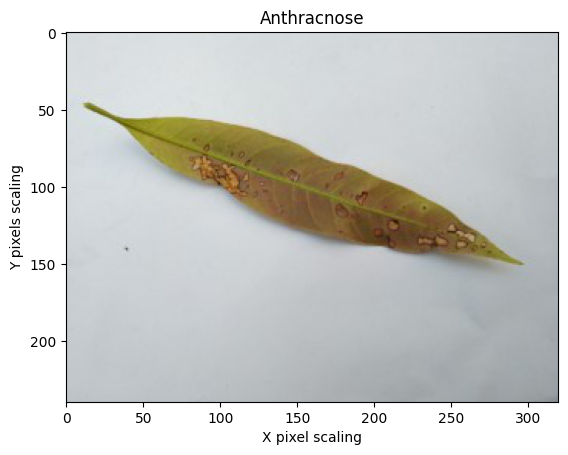

In [7]:
for label in labels:
    path = os.listdir(dir + '/' + label)
    img = dir + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

In [8]:
datagen = ImageDataGenerator(
    samplewise_center=True,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    validation_split=0.20
)

train_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)
test_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    shuffle=False,
    subset='validation'
)
validation_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    shuffle=False,
    subset='validation'
)

Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


Found 4000 images belonging to 8 classes.


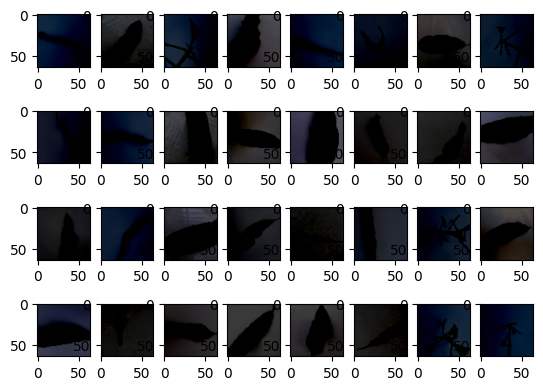

In [9]:
img_iter = datagen.flow_from_directory(dir,
                                       target_size=(64,64),
                                       batch_size=32)
x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(32):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [10]:
model=Sequential()
size=(64,64,3)
model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=size))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(8, activation='softmax'))##class number,in example i have 8 classes so i have given 8

#Compiling the model
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

#Training the model
base_model=model.fit(train_data, epochs=50, steps_per_epoch=len(train_data), validation_data=validation_data, validation_steps=len(validation_data))

Epoch 1/50
100/100 [==============================] - 41s 391ms/step - loss: 1.5126 - accuracy: 0.3778 - val_loss: 1.2854 - val_accuracy: 0.4600
Epoch 2/50
100/100 [==============================] - 22s 224ms/step - loss: 0.9372 - accuracy: 0.6234 - val_loss: 1.0238 - val_accuracy: 0.5838
Epoch 3/50
100/100 [==============================] - 24s 237ms/step - loss: 0.6117 - accuracy: 0.7803 - val_loss: 0.8522 - val_accuracy: 0.6900
Epoch 4/50
100/100 [==============================] - 24s 234ms/step - loss: 0.4686 - accuracy: 0.8316 - val_loss: 0.6909 - val_accuracy: 0.7663
Epoch 5/50
100/100 [==============================] - 29s 286ms/step - loss: 0.3580 - accuracy: 0.8759 - val_loss: 0.8937 - val_accuracy: 0.7075
Epoch 6/50
100/100 [==============================] - 23s 225ms/step - loss: 0.4127 - accuracy: 0.8550 - val_loss: 0.6400 - val_accuracy: 0.7725
Epoch 7/50
100/100 [==============================] - 29s 291ms/step - loss: 0.3223 - accuracy: 0.8884 - val_loss: 0.8401 - val_ac

In [11]:
print(base_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


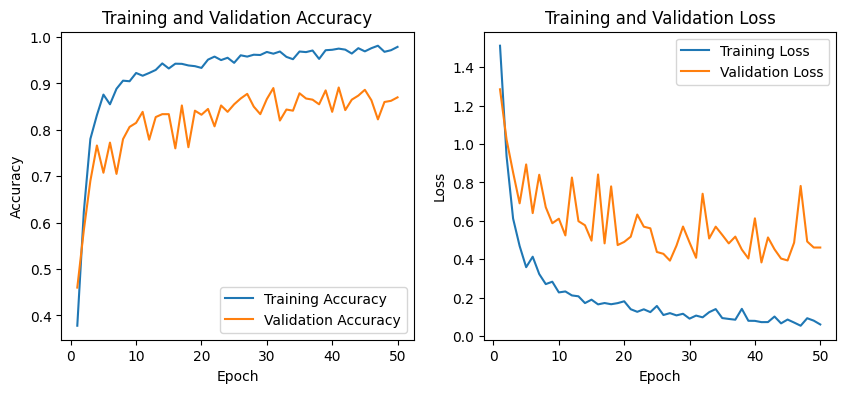

In [12]:
acc = base_model.history['accuracy']
val_acc = base_model.history['val_accuracy']
loss = base_model.history['loss']
val_loss = base_model.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

25/25 [==============================] - 3s 126ms/step - loss: 0.4346 - accuracy: 0.8838
Test loss: 0.43458038568496704
Test accuracy: 0.8837500214576721


25/25 [==============================] - 46s 2s/step - loss: 2.1205 - accuracy: 0.1338


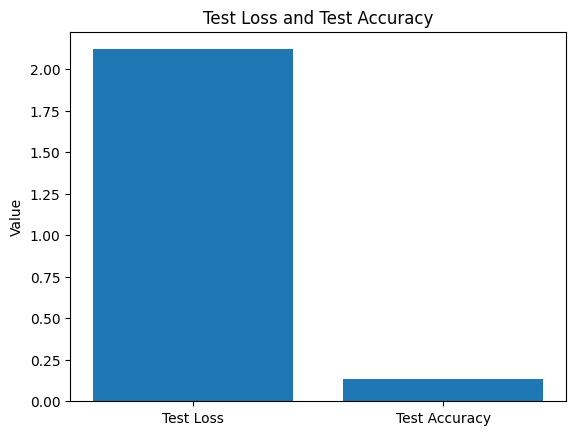

In [34]:
import matplotlib.pyplot as plt

# Calculate test loss and test accuracy
score = model.evaluate(test_data)
test_loss = score[0]
test_accuracy = score[1]

# Create labels for the plot
labels = ['Test Loss', 'Test Accuracy']
values = [test_loss, test_accuracy]

# Plot the diagram
plt.bar(labels, values)
plt.ylabel('Value')
plt.title('Test Loss and Test Accuracy')
plt.show()


In [ ]:
# Evaluate the model on the train, test, and validation data
train_acc = model.evaluate(train_data, verbose=0)[1]
test_acc = model.evaluate(test_data, verbose=0)[1]
val_acc = model.evaluate(validation_data, verbose=0)[1]

# Print out the validation accuracies for the train, test, and validation data
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)
print('Validation accuracy:', val_acc)

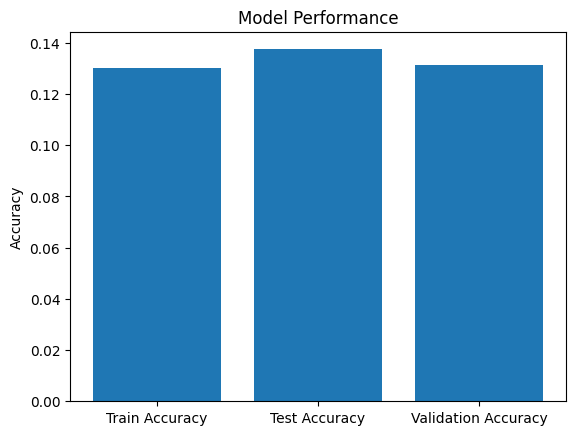

In [35]:
import matplotlib.pyplot as plt

# Calculate train, test, and validation accuracies
train_acc = model.evaluate(train_data, verbose=0)[1]
test_acc = model.evaluate(test_data, verbose=0)[1]
val_acc = model.evaluate(validation_data, verbose=0)[1]

# Create labels and values for the plot
labels = ['Train Accuracy', 'Test Accuracy', 'Validation Accuracy']
values = [train_acc, test_acc, val_acc]

# Plot the diagram
plt.bar(labels, values)
plt.ylabel('Accuracy')
plt.title('Model Performance')
plt.show()


In [15]:
predict=model.predict(test_data)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

25/25 [==============================] - 3s 114ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 1, 1, 4, 1, 1, 1,
       1, 4, 1, 4, 5, 4, 1, 5, 1, 1, 5, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 5, 5, 1, 1, 4, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

25/25 [==============================] - 42s 2s/step


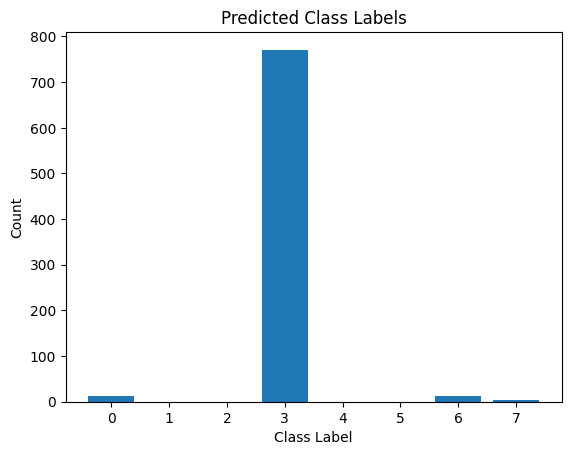

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test data
predict = model.predict(test_data)

# Get the predicted class labels
y_classes = predict.argmax(axis=-1)

# Count the occurrences of each class label
unique_labels, label_counts = np.unique(y_classes, return_counts=True)

# Plot the graph
plt.bar(unique_labels, label_counts)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Predicted Class Labels')
plt.show()


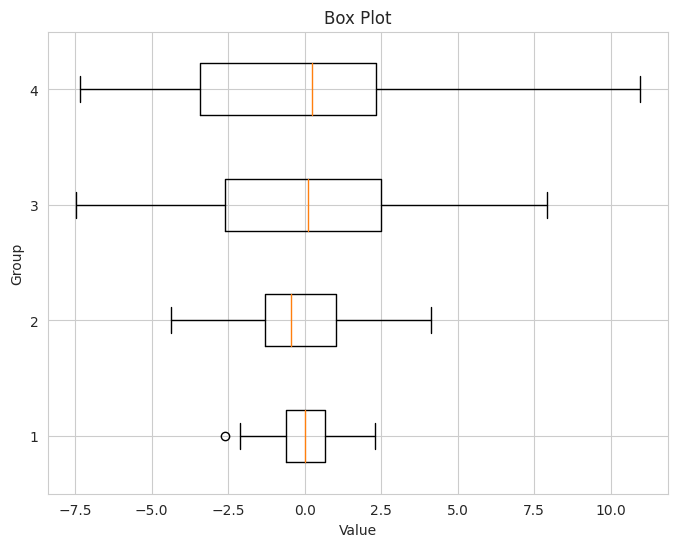

In [83]:
import matplotlib.pyplot as plt

# Example data
data = [np.random.normal(0, std, 100) for std in range(1, 5)]

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=False)
plt.xlabel('Value')
plt.ylabel('Group')
plt.title('Box Plot')
plt.show()


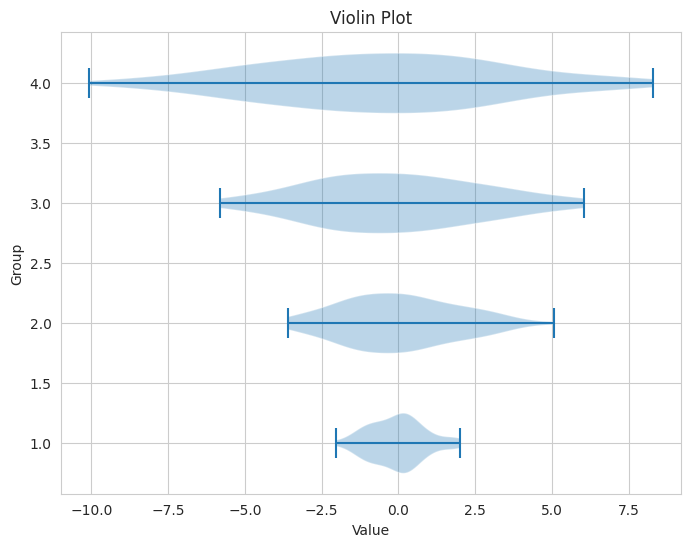

In [84]:
import matplotlib.pyplot as plt

# Example data
data = [np.random.normal(0, std, 100) for std in range(1, 5)]

# Create a violin plot
plt.figure(figsize=(8, 6))
plt.violinplot(data, vert=False)
plt.xlabel('Value')
plt.ylabel('Group')
plt.title('Violin Plot')
plt.show()


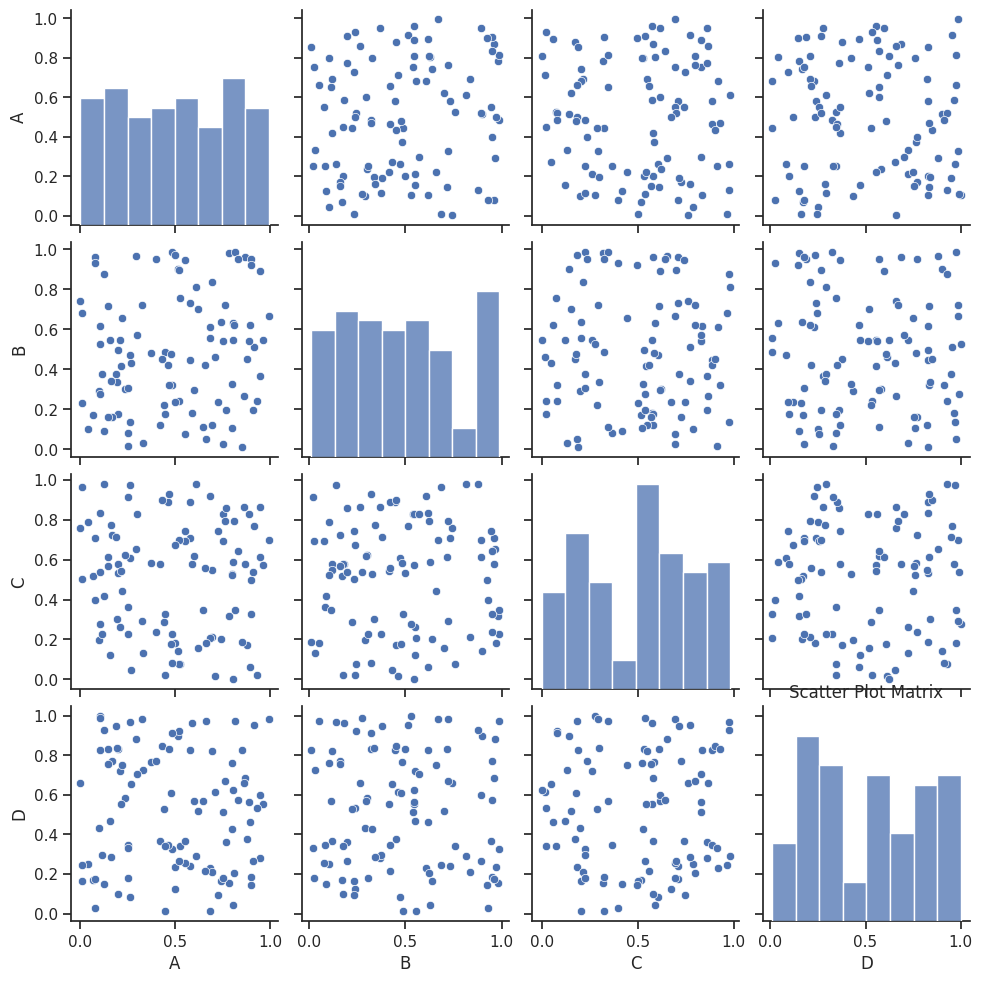

In [85]:
import pandas as pd
import seaborn as sns

# Example data
data = pd.DataFrame(np.random.rand(100, 4), columns=['A', 'B', 'C', 'D'])

# Create a scatter plot matrix
sns.set(style="ticks")
sns.pairplot(data)
plt.title('Scatter Plot Matrix')
plt.show()


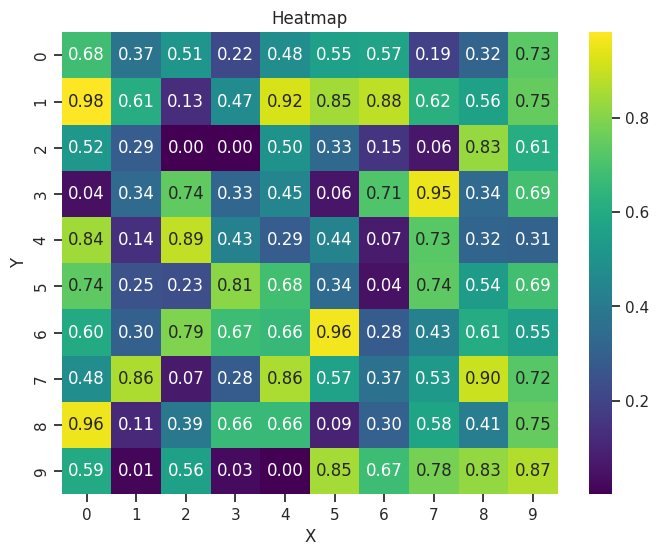

In [86]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = np.random.rand(10, 10)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data, cmap='viridis', annot=True, fmt='.2f')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap')
plt.show()


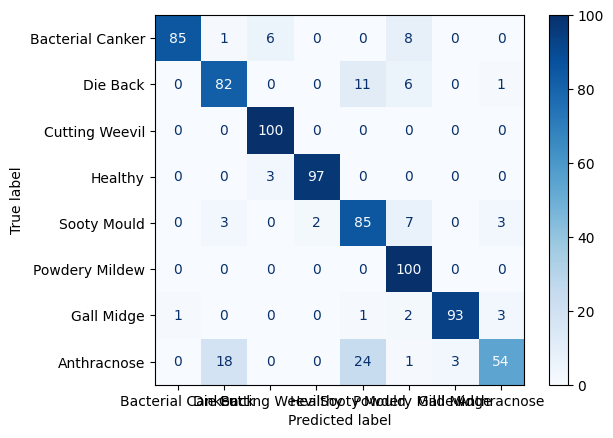

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
cm = confusion_matrix(test_data.classes, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


disp.plot(cmap=plt.cm.Blues)
plt.show();

In [17]:
print(classification_report(test_data.classes, y_classes))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91       100
           1       0.79      0.82      0.80       100
           2       0.92      1.00      0.96       100
           3       0.98      0.97      0.97       100
           4       0.70      0.85      0.77       100
           5       0.81      1.00      0.89       100
           6       0.97      0.93      0.95       100
           7       0.89      0.54      0.67       100

    accuracy                           0.87       800
   macro avg       0.88      0.87      0.87       800
weighted avg       0.88      0.87      0.87       800



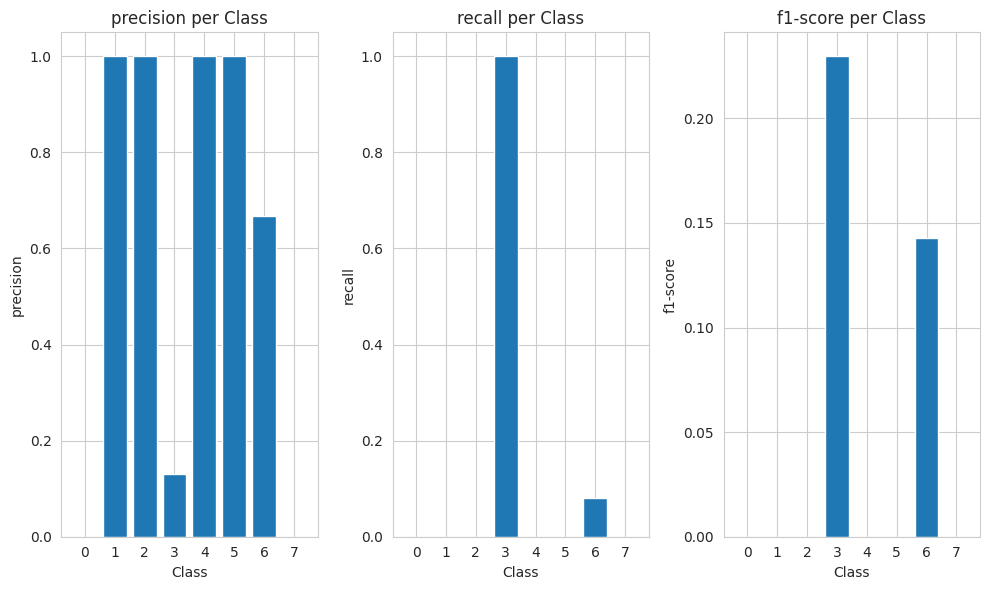

In [40]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report
report = classification_report(test_data.classes, y_classes, output_dict=True, zero_division=1)

# Extract precision, recall, F1-score for each class
class_labels = list(report.keys())[:-3]  # Exclude the 'macro avg', 'weighted avg', and 'accuracy' entries
metrics = ['precision', 'recall', 'f1-score']
values = [[report[label][metric] for metric in metrics] for label in class_labels]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    plt.bar(class_labels, [v[i] for v in values])
    plt.xlabel('Class')
    plt.ylabel(metric)
    plt.title(f'{metric} per Class')
plt.tight_layout()
plt.show()


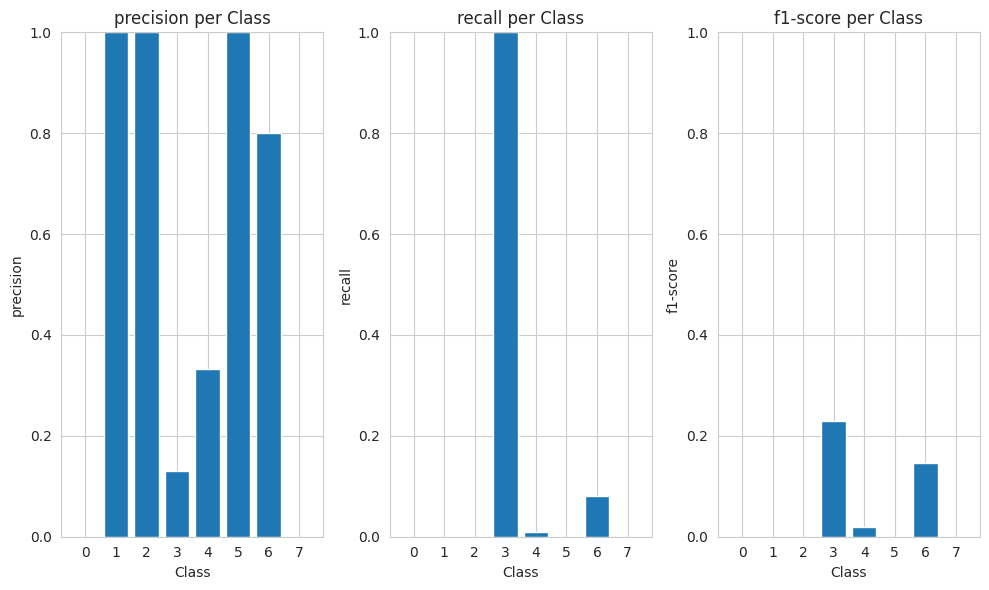

In [45]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report
report = classification_report(test_data.classes, y_classes, output_dict=True, zero_division=1)

# Extract precision, recall, F1-score for each class
class_labels = list(report.keys())[:-3]  # Exclude the 'macro avg', 'weighted avg', and 'accuracy' entries
metrics = ['precision', 'recall', 'f1-score']
values = [[report[label][metric] for metric in metrics] for label in class_labels]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
for i, metric in enumerate(metrics):
    ax = plt.subplot(1, 3, i + 1)
    ax.bar(class_labels, [v[i] for v in values])
    ax.set_xlabel('Class')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} per Class')
    ax.set_ylim([0, 1])  # Set the y-axis limit to [0, 1] for better visualization
plt.tight_layout()
plt.show()


25/25 [==============================] - 45s 2s/step


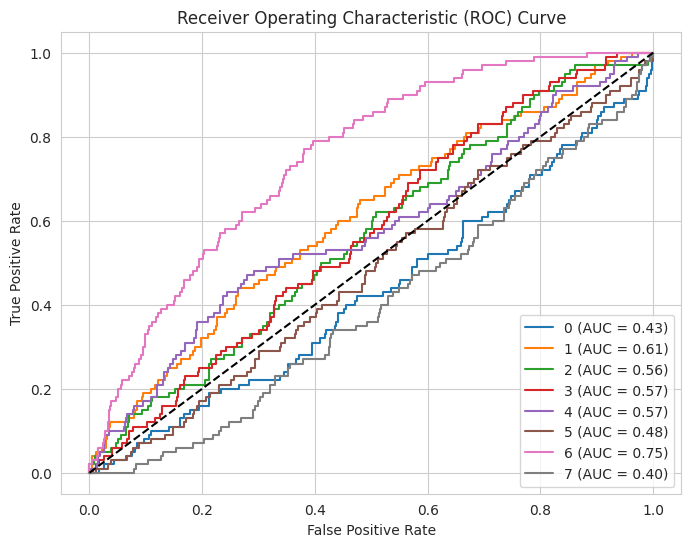

In [47]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
y_pred = model.predict(test_data)
n_classes = y_pred.shape[1]

# Prepare the true labels in one-hot encoded format
y_true = np.eye(n_classes)[test_data.classes]

# Compute the ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


25/25 [==============================] - 44s 2s/step


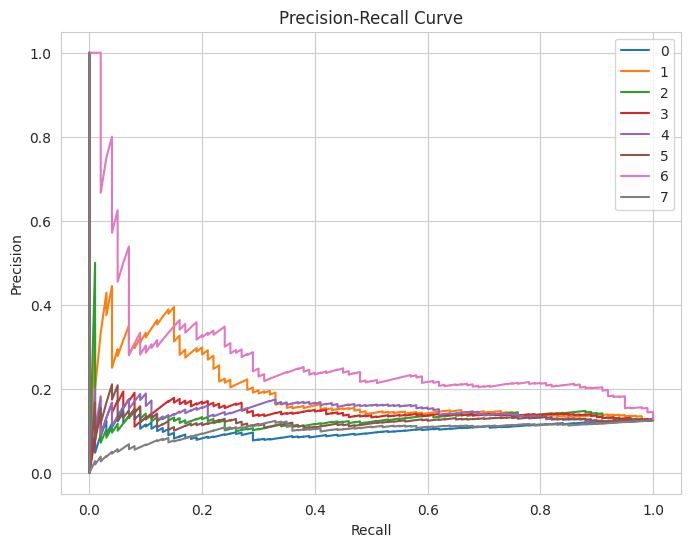

In [49]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Get the predicted probabilities for each class
y_pred = model.predict(test_data)
n_classes = y_pred.shape[1]

# Prepare the true labels in one-hot encoded format
y_true = np.eye(n_classes)[test_data.classes]

# Calculate the precision and recall for each class
precision = {}
recall = {}
thresholds = {}
for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_true[:, i], y_pred[:, i])

# Plot the Precision-Recall curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=class_labels[i])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from sklearn.metrics import classification_report

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
#base_model = model.fit(train_data, train_labels, epochs=50, steps_per_epoch=len(train_data), validation_data=(validation_data, validation_labels), validation_steps=len(validation_data))

#Training the model
#base_model=model.fit(train_data, epochs=50, steps_per_epoch=len(train_data), validation_data=validation_data, validation_steps=len(validation_data))

# Get the predicted classes
y_pred = model.predict(test_data)
y_classes = y_pred.argmax(axis=-1)

# Print the classification report
print(classification_report(test_data.classes, y_classes))


58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


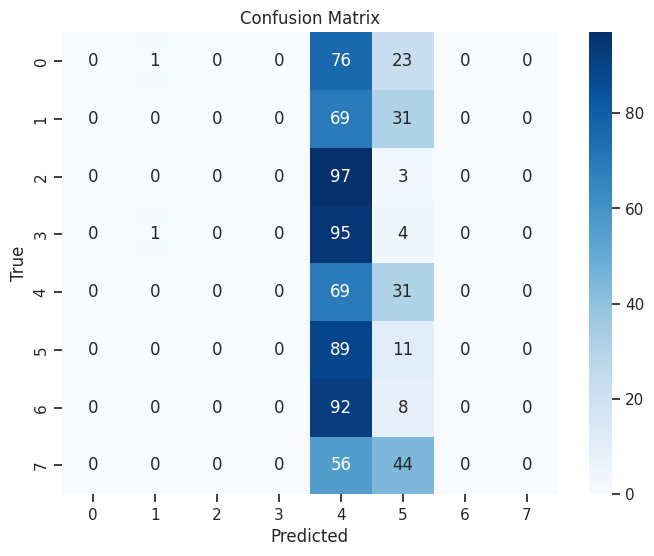

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(test_data.classes, y_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


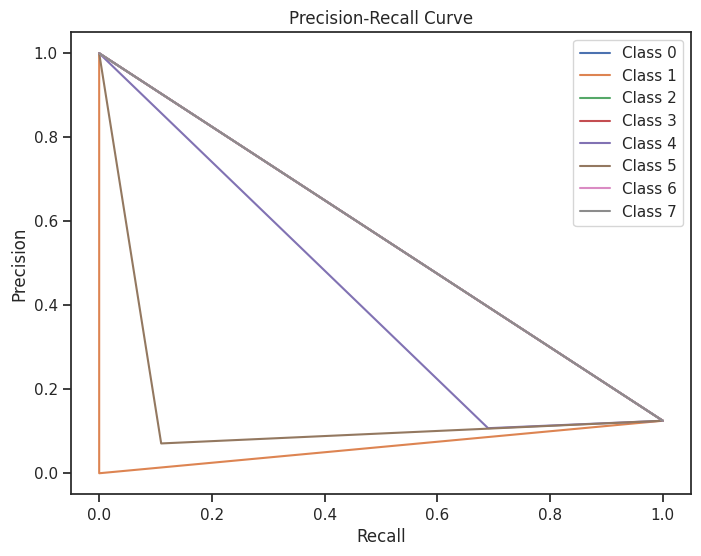

In [95]:
from sklearn.metrics import precision_recall_curve

# Calculate the precision and recall for each class
precision = {}
recall = {}
thresholds = {}
for i in range(len(class_labels)):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(test_data.classes == i, y_classes == i)

# Plot the Precision-Recall curves
plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    plt.plot(recall[i], precision[i], label='Class {}'.format(i))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                                 
 dense_34 (Dense)            (None, 256)               524544    
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                                 
 dense_35 (Dense)            (None, 256)               65792     
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_36 (Dense)            (None, 128)              

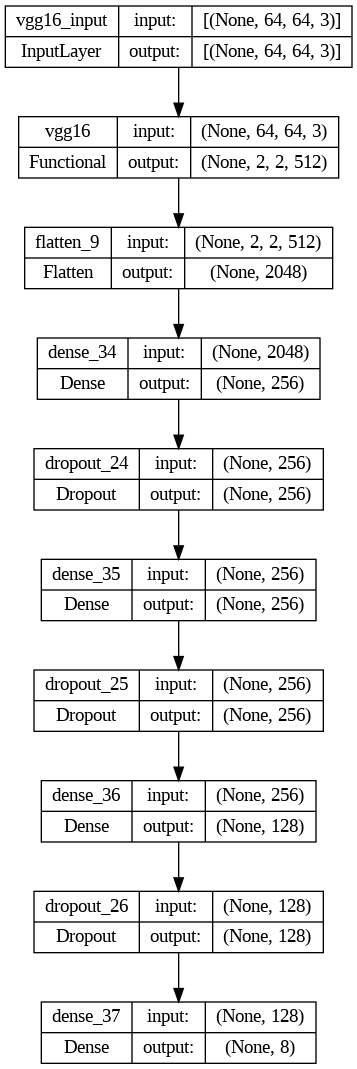

In [88]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.utils import plot_model

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Save the model architecture to a file
plot_model(model, to_file='model.png', show_shapes=True)


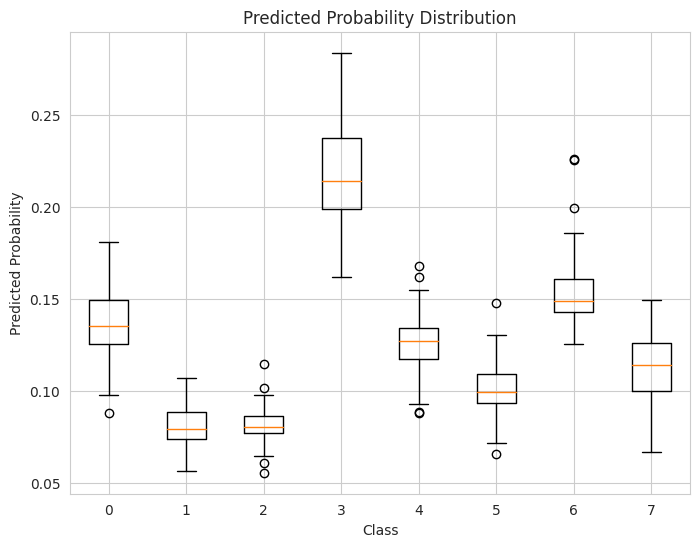

In [51]:
import matplotlib.pyplot as plt

# Prepare the data for each class
class_data = []
for i in range(len(class_labels)):
    class_samples = test_data.classes == i
    class_values = y_pred[class_samples][:, i]
    class_data.append(class_values)

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(class_data, labels=class_labels)
plt.xlabel('Class')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probability Distribution')
plt.show()


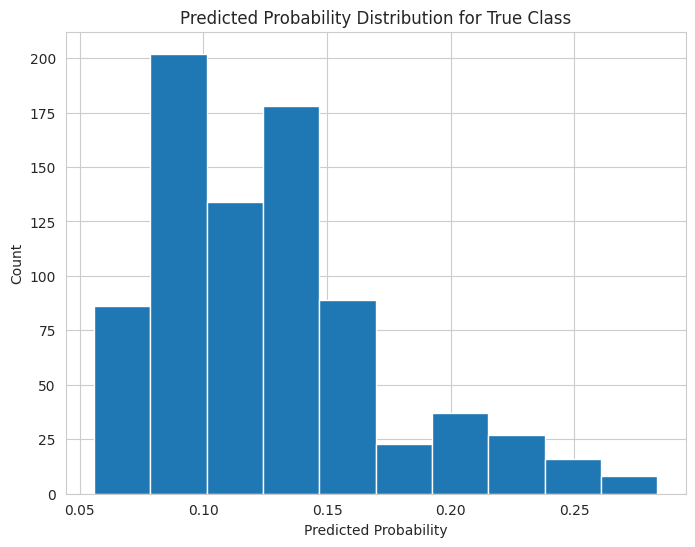

In [52]:
import matplotlib.pyplot as plt

# Get the predicted probabilities for the true class
true_class_probs = y_pred[np.arange(len(y_pred)), test_data.classes]

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(true_class_probs, bins=10)
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Predicted Probability Distribution for True Class')
plt.show()


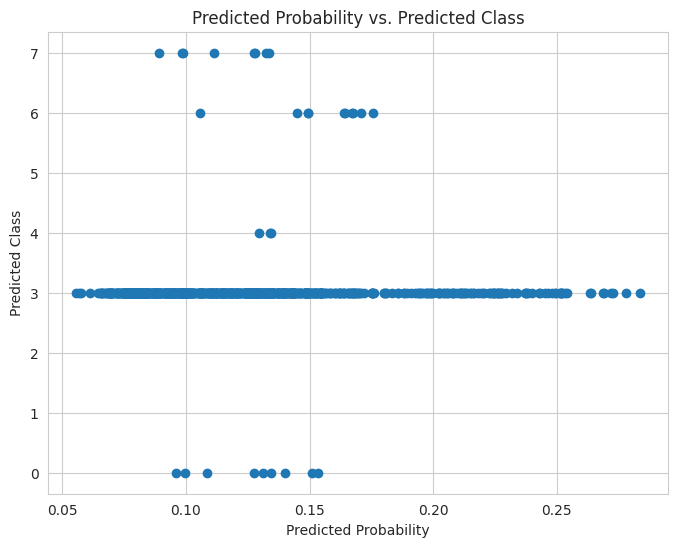

In [53]:
import matplotlib.pyplot as plt

# Get the predicted probabilities for the true class
true_class_probs = y_pred[np.arange(len(y_pred)), test_data.classes]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(true_class_probs, y_classes)
plt.xlabel('Predicted Probability')
plt.ylabel('Predicted Class')
plt.title('Predicted Probability vs. Predicted Class')
plt.show()


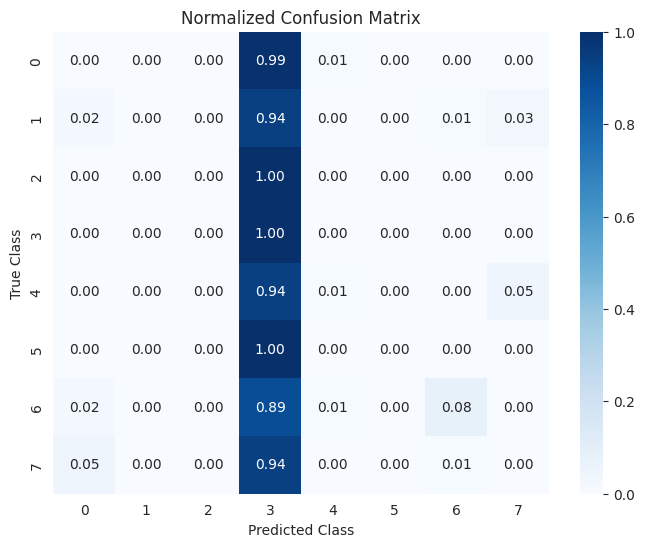

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion_matrix = np.zeros((len(class_labels), len(class_labels)))
for true_label, predicted_label in zip(test_data.classes, y_classes):
    confusion_matrix[true_label][predicted_label] += 1

# Normalize the confusion matrix
normalized_confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Normalized Confusion Matrix')
plt.show()


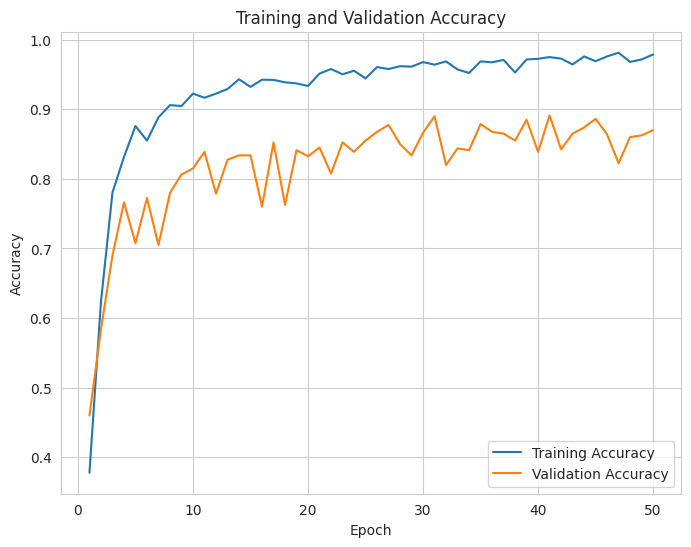

In [55]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy over epochs
train_acc = base_model.history['accuracy']
val_acc = base_model.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


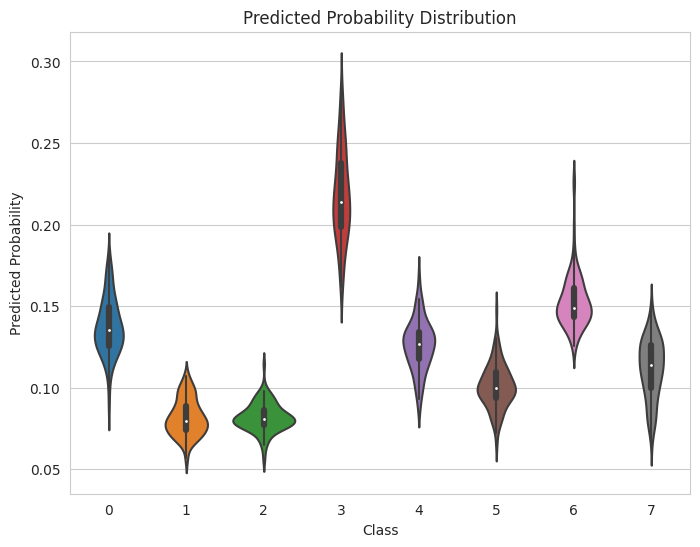

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for each class
class_data = []
for i in range(len(class_labels)):
    class_samples = test_data.classes == i
    class_values = y_pred[class_samples][:, i]
    class_data.append(class_values)

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=class_data)
plt.xticks(range(len(class_labels)), class_labels)
plt.xlabel('Class')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probability Distribution')
plt.show()


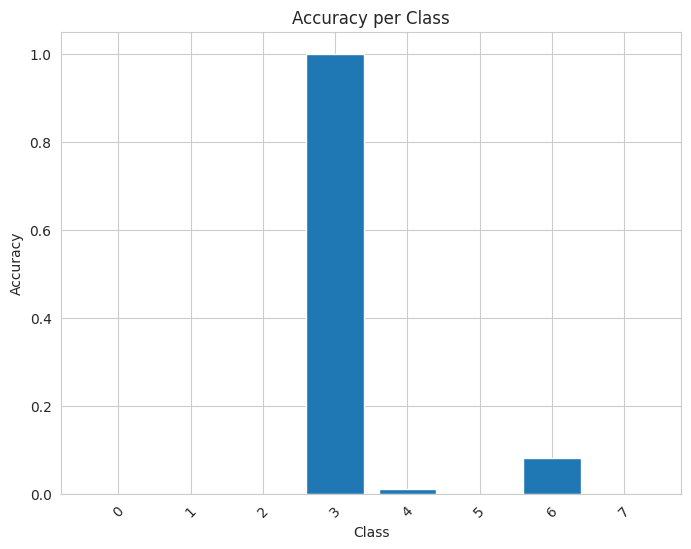

In [57]:
import matplotlib.pyplot as plt

# Calculate the accuracy for each class
accuracy_per_class = []
for i in range(len(class_labels)):
    class_samples = test_data.classes == i
    class_accuracy = np.mean(y_classes[class_samples] == test_data.classes[class_samples])
    accuracy_per_class.append(class_accuracy)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(class_labels, accuracy_per_class)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy per Class')
plt.xticks(rotation=45)
plt.show()


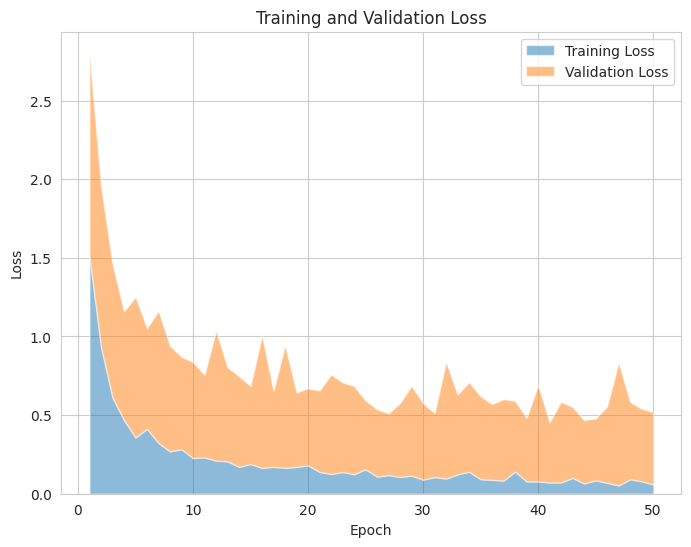

In [58]:
import matplotlib.pyplot as plt

# Get the training loss and validation loss over epochs
train_loss = base_model.history['loss']
val_loss = base_model.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Create an area plot
plt.figure(figsize=(8, 6))
plt.stackplot(epochs, train_loss, val_loss, labels=['Training Loss', 'Validation Loss'], alpha=0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.show()


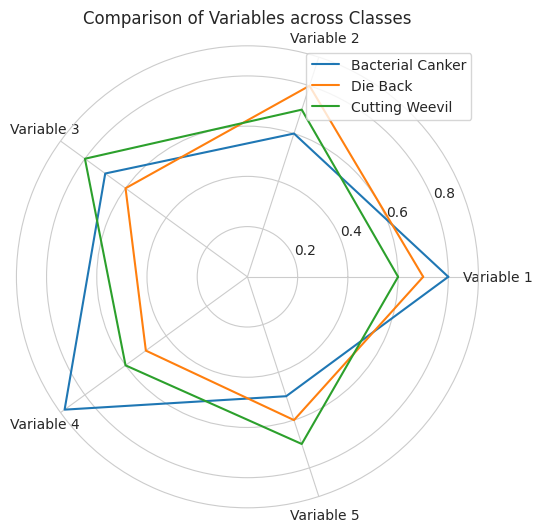

In [59]:
import matplotlib.pyplot as plt

# Define the variables for each class
class_variables = {
    'Bacterial Canker': [0.8, 0.6, 0.7, 0.9, 0.5],
    'Die Back': [0.7, 0.8, 0.6, 0.5, 0.6],
    'Cutting Weevil': [0.6, 0.7, 0.8, 0.6, 0.7],
    # Add variables for other classes
}

# Create a radar chart
plt.figure(figsize=(8, 6))
labels = ['Variable 1', 'Variable 2', 'Variable 3', 'Variable 4', 'Variable 5']
for class_label, class_variables in class_variables.items():
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    class_variables += class_variables[:1]
    angles += angles[:1]
    plt.polar(angles, class_variables, label=class_label)
plt.xticks(angles[:-1], labels)
plt.title('Comparison of Variables across Classes')
plt.legend(loc='upper right')
plt.show()


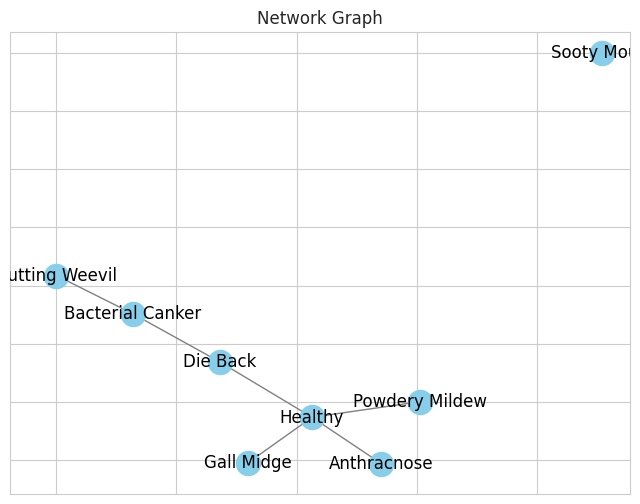

In [63]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the nodes and edges
nodes = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']
edges = [('Bacterial Canker', 'Die Back'), ('Bacterial Canker', 'Cutting Weevil'), ('Die Back', 'Healthy'), ('Healthy', 'Powdery Mildew'), ('Healthy', 'Gall Midge'), ('Healthy', 'Anthracnose')]

# Create a graph object
G = nx.Graph()

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw the network graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout algorithm for arranging the nodes
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title('Network Graph')
plt.show()


<Figure size 800x600 with 0 Axes>

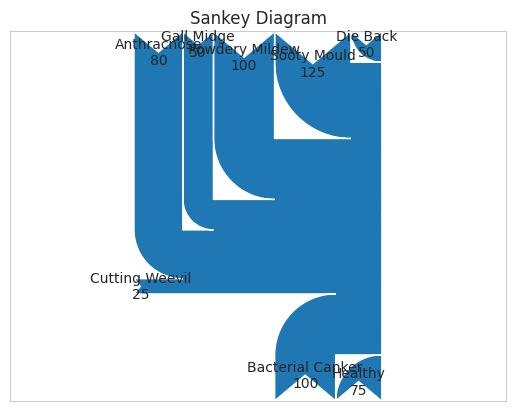

In [66]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

# Define the flows and labels
flows = [100, 50, 25, 75, 125, 100, 50, 80]
labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

# Create a Sankey diagram
plt.figure(figsize=(8, 6))
sankey = Sankey()
sankey.add(flows=flows, labels=labels, orientations=[-1, 1, 0, -1, 1, 1, 1, 1])
sankey.finish()
plt.title('Sankey Diagram')
plt.show()


In [68]:
!pip install plotly

In [71]:
!pip install pychord

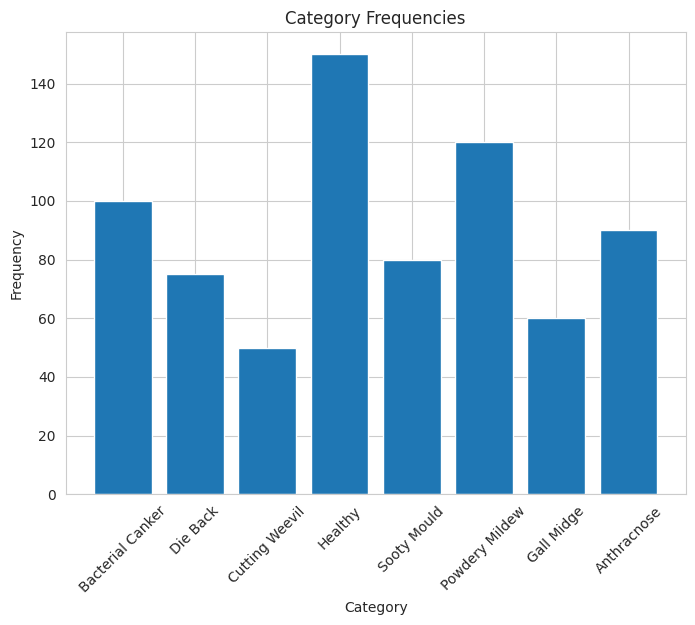

In [77]:
import matplotlib.pyplot as plt

# Define the categories and their frequencies
categories = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']
frequencies = [100, 75, 50, 150, 80, 120, 60, 90]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, frequencies)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Category Frequencies')
plt.xticks(rotation=45)
plt.show()


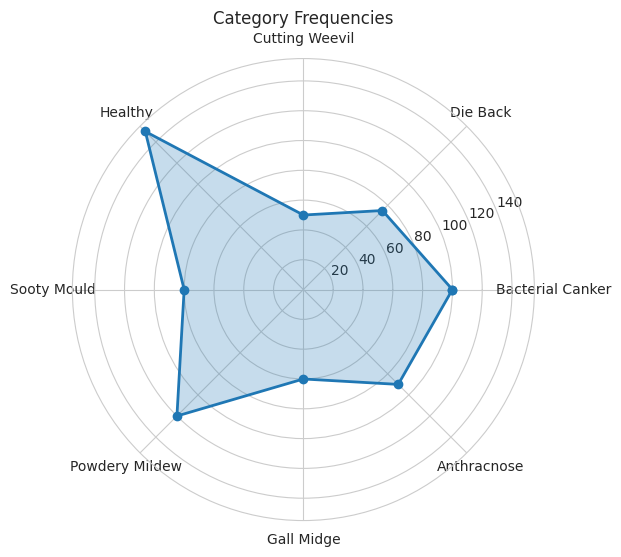

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Define the categories
categories = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

# Define the frequencies of each category
frequencies = [100, 75, 50, 150, 80, 120, 60, 90]

# Calculate the angle for each category
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Calculate the frequencies for the closed plot
frequencies += frequencies[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
ax.plot(angles, frequencies, 'o-', linewidth=2)
ax.fill(angles, frequencies, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), labels=categories)
ax.set_title('Category Frequencies')
ax.grid(True)

plt.show()


25/25 [==============================] - 46s 2s/step


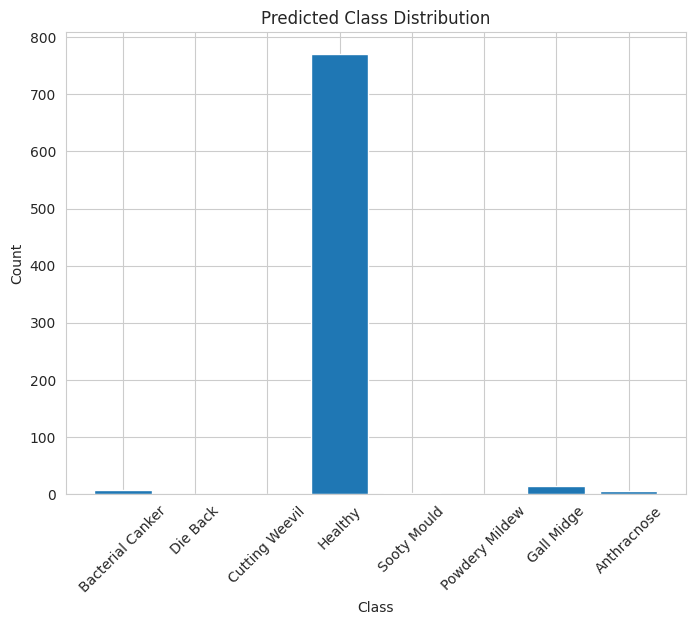

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted classes
y_pred = model.predict(test_data)
y_classes = y_pred.argmax(axis=-1)

# Calculate the class counts
class_counts = np.bincount(y_classes)

# Get the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Predicted Class Distribution')
plt.xticks(rotation=45)
plt.show()


25/25 [==============================] - 48s 2s/step


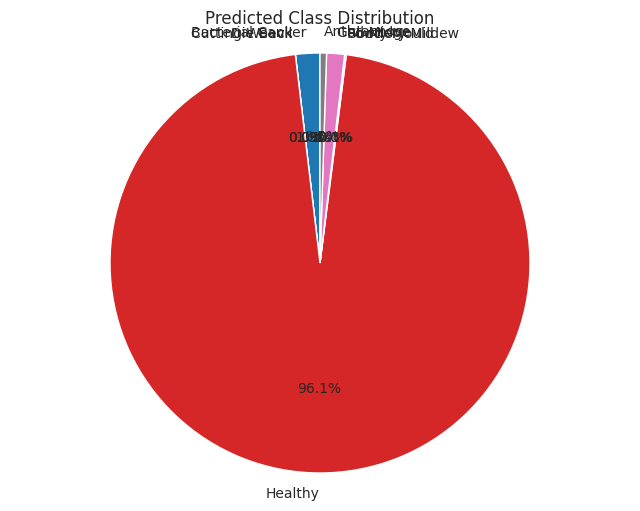

In [43]:
import matplotlib.pyplot as plt

# Get the predicted classes
y_pred = model.predict(test_data)
y_classes = y_pred.argmax(axis=-1)

# Calculate the class counts
class_counts = np.bincount(y_classes)

# Get the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90)
plt.title('Predicted Class Distribution')
plt.axis('equal')
plt.show()


25/25 [==============================] - 43s 2s/step


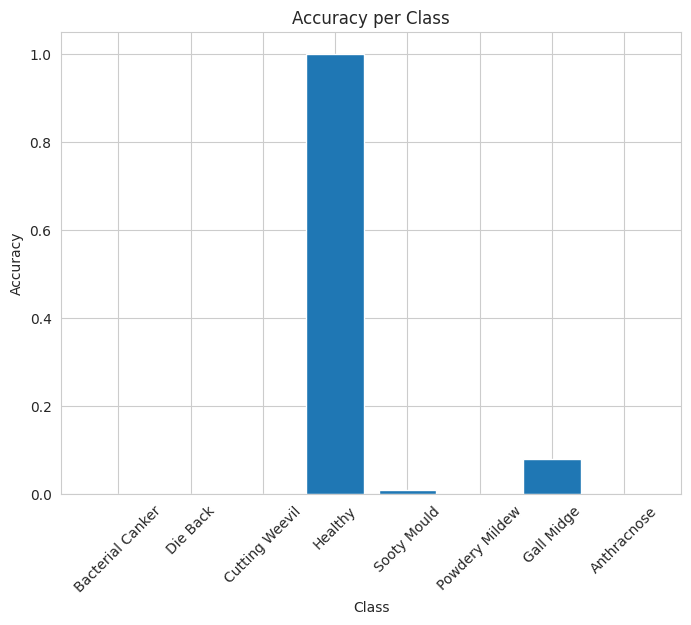

In [44]:
import matplotlib.pyplot as plt

# Get the predicted classes and true labels
y_pred = model.predict(test_data)
y_classes = y_pred.argmax(axis=-1)
true_labels = test_data.classes

# Calculate the accuracy per class
class_accuracy = []
for i in range(len(class_labels)):
    class_samples = np.where(true_labels == i)[0]
    class_correct = np.sum(y_classes[class_samples] == true_labels[class_samples])
    class_accuracy.append(class_correct / len(class_samples))

# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy per Class')
plt.xticks(rotation=45)
plt.show()


In [27]:
from PIL import Image
import numpy as np

# Upload an image file
uploaded = files.upload()

# Get the uploaded image file
image_path = next(iter(uploaded))

# Load and preprocess the image
image = Image.open(image_path)
image = image.resize((64, 64))  # Resize the image to match the input shape of the model
image_array = np.array(image) / 255.0  # Normalize the image

# Reshape the image array to match the input shape of the model
image_array = np.expand_dims(image_array, axis=0)

# Make predictions using the model
predictions = model.predict(image_array)
predicted_class_index = np.argmax(predictions[0])

# Define the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

# Display the predicted class label
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_label)

Saving 20211008_124249 (Custom).jpg to 20211008_124249 (Custom) (1).jpg
1/1 [==============================] - 0s 194ms/step
Predicted class: Anthracnose


In [25]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [26]:
import gradio as gr
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from PIL import Image

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

def classify_image(image):
    # Preprocess the image
    image = Image.fromarray(image.astype('uint8'))
    image = image.resize((64, 64))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions using the model
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label

# Create the input and output interfaces
image_input = gr.inputs.Image()
label_output = gr.outputs.Textbox()

# Create the interface and run it
interface = gr.Interface(fn=classify_image, inputs=image_input, outputs=label_output)
interface.launch()


<ipython-input-26-21a7385807ad>:56: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image_input = gr.inputs.Image()
<ipython-input-26-21a7385807ad>:56: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image_input = gr.inputs.Image()
<ipython-input-26-21a7385807ad>:57: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label_output = gr.outputs.Textbox()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [28]:
import gradio as gr
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from PIL import Image

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

def classify_image(image):
    # Preprocess the image
    image = Image.fromarray(image.astype('uint8'))
    image = image.resize((64, 64))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions using the model
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label

def classify_video(video):
    cap = cv2.VideoCapture(video.name)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)
    cap.release()

    labels = []
    for frame in frames:
        label = classify_image(frame)
        labels.append(label)

    return labels

# Create the input and output interfaces
image_input = gr.inputs.Image()
video_input = gr.inputs.Video(type='mp4')
label_output = gr.outputs.Textbox(label="Predicted class")

# Create the interface and run it
interface = gr.Interface(fn=classify_video, inputs=video_input, outputs=label_output)
interface.launch()


<ipython-input-28-81c3a2cef8bc>:75: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image_input = gr.inputs.Image()
<ipython-input-28-81c3a2cef8bc>:75: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image_input = gr.inputs.Image()
<ipython-input-28-81c3a2cef8bc>:76: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  video_input = gr.inputs.Video(type='mp4')
<ipython-input-28-81c3a2cef8bc>:76: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  video_input = gr.inputs.Video(type='mp4')
<ipython-input-28-81c3a2cef8bc>:77: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label_output = gr.outpu

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [29]:
import gradio as gr
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from PIL import Image

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

def classify_image(image):
    # Preprocess the image
    image = Image.fromarray(image.astype('uint8'))
    image = image.resize((64, 64))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions using the model
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label

# Create a function to capture webcam frames and classify them
def classify_webcam():
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        label = classify_image(frame)
        frame = cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow('Webcam', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

# Create the input and output interfaces
webcam_input = gr.inputs.Image(label="Webcam")
label_output = gr.outputs.Textbox(label="Prediction")

# Create the interface and run it
interface = gr.Interface(fn=classify_image, inputs=webcam_input, outputs=label_output, capture_session=True)
interface.launch(share=True)


<ipython-input-29-158c0826d4f4>:71: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  webcam_input = gr.inputs.Image(label="Webcam")
<ipython-input-29-158c0826d4f4>:71: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  webcam_input = gr.inputs.Image(label="Webcam")
<ipython-input-29-158c0826d4f4>:72: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label_output = gr.outputs.Textbox(label="Prediction")
<ipython-input-29-158c0826d4f4>:75: GradioDeprecationWarning: `capture_session` parameter is deprecated, and it has no effect
  interface = gr.Interface(fn=classify_image, inputs=webcam_input, outputs=label_output, capture_session=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3250f6c53de09d4cf6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [30]:
!pip install gradio
!pip install opencv-python


1/1 [==============================] - 0s 392ms/step


In [31]:
import gradio as gr
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from PIL import Image
import cv2

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

def classify_frame(frame):
    # Preprocess the frame
    frame = cv2.resize(frame, (64, 64))
    frame = frame / 255.0
    frame = np.expand_dims(frame, axis=0)

    # Make predictions using the model
    predictions = model.predict(frame)
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label

def process_video(video_file):
    # Load the video file
    video = cv2.VideoCapture(video_file)

    # Get the total number of frames
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    # Iterate over each frame
    for frame_index in range(total_frames):
        # Read the frame
        ret, frame = video.read()

        # If frame reading was successful
        if ret:
            # Perform object detection on the frame
            predicted_class_label = classify_frame(frame)

            # Display the predicted class label
            print("Frame:", frame_index, "Predicted class:", predicted_class_label)
        else:
            break

# Create the input and output interfaces
video_input = gr.inputs.Video(type="file")
label_output = gr.outputs.Textbox()

# Create the interface and run it
interface = gr.Interface(fn=process_video, inputs=video_input, outputs=label_output)
interface.launch()


<ipython-input-31-960257ab3567>:78: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  video_input = gr.inputs.Video(type="file")
<ipython-input-31-960257ab3567>:78: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  video_input = gr.inputs.Video(type="file")
<ipython-input-31-960257ab3567>:79: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label_output = gr.outputs.Textbox()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [32]:
import gradio as gr
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from PIL import Image

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

def classify_image(image):
    # Preprocess the image
    image = Image.fromarray(image.astype('uint8'))
    image = image.resize((64, 64))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions using the model
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    # Define actions for each class
    actions = {
        'Bacterial Canker': 'Action 1: Take preventive measures XYZ.',
        'Die Back': 'Action 2: Apply treatment ABC.',
        'Cutting Weevil': 'Action 3: Implement control measures DEF.',
        'Healthy': 'No action required. The plant is healthy.',
        'Sooty Mould': 'Action 4: Remove infected parts and apply fungicide GHI.',
        'Powdery Mildew': 'Action 5: Apply fungicide JKL and maintain proper air circulation.',
        'Gall Midge': 'Action 6: Apply insecticide MNO during the specified period.',
        'Anthracnose': 'Action 7: Apply fungicide PQR and prune infected branches.'
    }

    # Get the action for the predicted class label
    action = actions.get(predicted_class_label, 'No specific action suggested.')

    # Generate the report
    report = f"Detected class: {predicted_class_label}\n\nSuggested action for farmers: {action}"

    return report

# Create the input and output interfaces
image_input = gr.inputs.Image()
report_output = gr.outputs.Textbox()

# Create the interface and run it
interface = gr.Interface(fn=classify_image, inputs=image_input, outputs=report_output)
interface.launch()


<ipython-input-32-bb7df064b383>:74: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image_input = gr.inputs.Image()
<ipython-input-32-bb7df064b383>:74: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image_input = gr.inputs.Image()
<ipython-input-32-bb7df064b383>:75: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  report_output = gr.outputs.Textbox()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [33]:
import gradio as gr
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from PIL import Image

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

def classify_image(image):
    # Preprocess the image
    image = Image.fromarray(image.astype('uint8'))
    image = image.resize((64, 64))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions using the model
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    # Get the model's accuracy
    accuracy = predictions[0][predicted_class_index]

    return predicted_class_label, accuracy

# Create the input and output interfaces
image_input = gr.inputs.Image()
label_output = gr.outputs.Textbox()

# Create the interface and run it
interface = gr.Interface(fn=classify_image, inputs=image_input, outputs=label_output)
interface.launch()


<ipython-input-33-b96e01ac98b3>:59: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image_input = gr.inputs.Image()
<ipython-input-33-b96e01ac98b3>:59: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image_input = gr.inputs.Image()
<ipython-input-33-b96e01ac98b3>:60: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label_output = gr.outputs.Textbox()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>